In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Implémentation sous BRIAN

Différents simulateurs sont testés afin d'évaluer leurs souplesse d'utilisation ainsi que leur efficacité.
Nous commençons donc par tester Brian. (http://brian-simulator.org). La particularité de Brian est qu'il permet à son utilisateur de créer un modèle en rentrant l'équation différentielle de sa dynamique. Il permet donc une souplesse maximale quant au choix du modèle neuronal, tout en prenant en charge la mise en réseau des neurones. Afin de se familiariser avec cet outil, nous implémentons un simple neurone intègre et décharge. (voir  https://brian.readthedocs.org/en/latest/tutorial1_basic_concepts.html#tutorial-1-basic-concepts)


In [6]:
from brian import *
tau = 20 * msecond
Vt = -50 * mvolt
Vr = -60 * mvolt
El = -49 * mvolt
psp = 0.5 * mvolt

G = NeuronGroup(N=40, model='dV/dt = -(V-El)/tau : volt', threshold=Vt, reset=Vr)

C = Connection(G, G, sparseness=0.1, weight=psp)

M = StateMonitor(G, 'V', record=0)

G.V = Vr + rand(40) * (Vt - Vr)

run(200 * msecond)

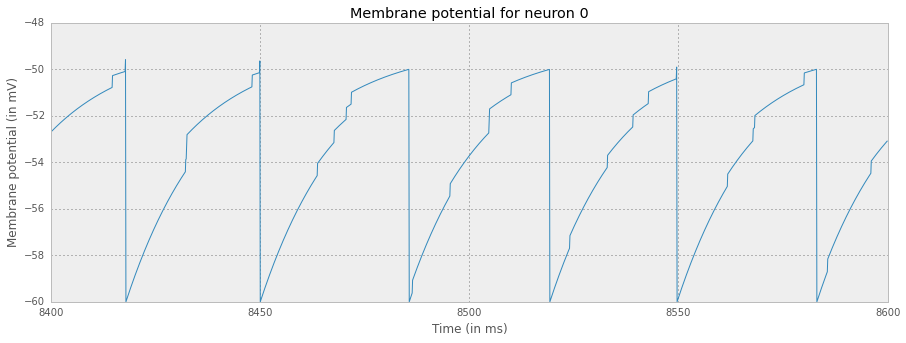

In [7]:
figure(figsize=(15,5))
plot(M.times/ms, M[0]/mV)
xlabel('Time (in ms)')
ylabel('Membrane potential (in mV)')
title('Membrane potential for neuron 0')
show()

### performance

In [8]:
%%timeit
run(200 * msecond)

10 loops, best of 3: 178 ms per loop
